In [108]:
#Objective: Predict amount spend in F&B segmeent by each tourist
#Author - Kuntal Das

In [109]:
#Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [110]:
from datetime import datetime

In [202]:
#Read Train and Test data
train = pd.read_csv("D:/Data Science/Hackathon/Club Mahindra/train_5CLrC8b/train.csv")

In [203]:
train.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

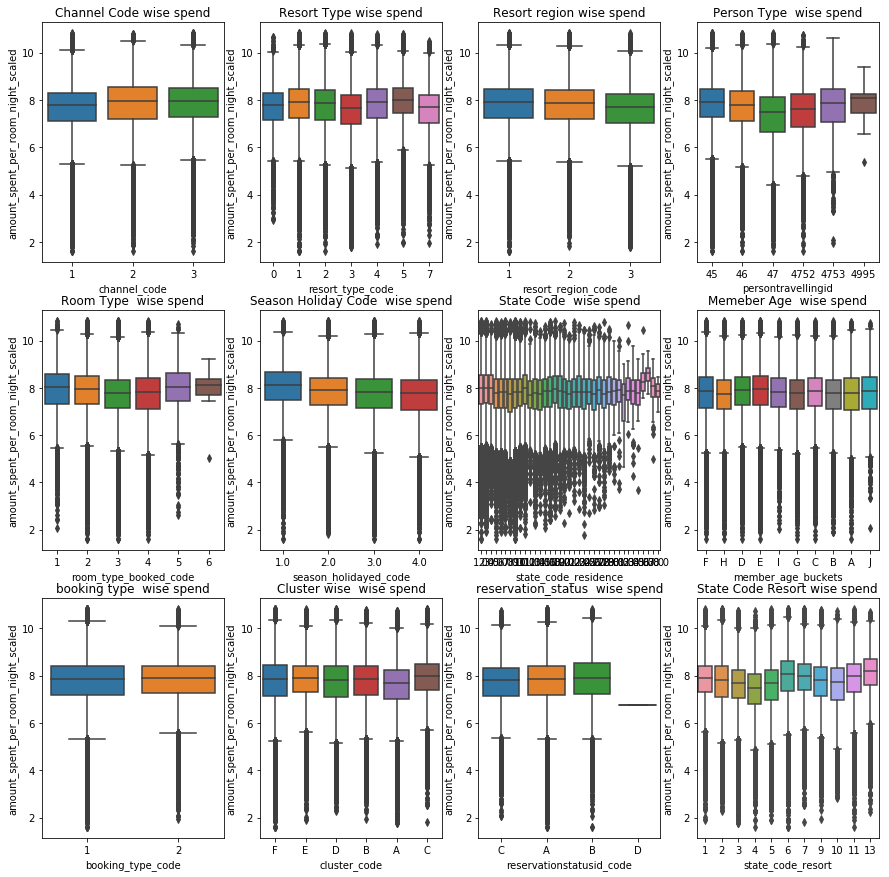

In [204]:

##Boxplot to look at which categorical variables are showing significant distinguishing factor with spend. Based on the plot resort type, resort state, 
##person type, room type season holiday code and memeber age is shoing distinguishing factor
fig,ax = plt.subplots(3,4)
sns.boxplot(data=train,x="channel_code",y = 'amount_spent_per_room_night_scaled',ax=ax[0,0]).set_title("Channel Code wise spend")


sns.boxplot(data=train,x="resort_type_code",y = 'amount_spent_per_room_night_scaled',ax=ax[0,1]).set_title("Resort Type wise spend")


sns.boxplot(data=train,x="resort_region_code",y = 'amount_spent_per_room_night_scaled',ax=ax[0,2]).set_title("Resort region wise spend")


sns.boxplot(data=train,x="persontravellingid",y = 'amount_spent_per_room_night_scaled',ax=ax[0,3]).set_title("Person Type  wise spend")


sns.boxplot(data=train,x="room_type_booked_code",y = 'amount_spent_per_room_night_scaled',ax=ax[1,0]).set_title("Room Type  wise spend")


sns.boxplot(data=train,x="season_holidayed_code",y = 'amount_spent_per_room_night_scaled',ax=ax[1,1]).set_title("Season Holiday Code  wise spend")


sns.boxplot(data=train,x="state_code_residence",y = 'amount_spent_per_room_night_scaled',ax=ax[1,2]).set_title("State Code  wise spend")


sns.boxplot(data=train,x="member_age_buckets",y = 'amount_spent_per_room_night_scaled',ax=ax[1,3]).set_title("Memeber Age  wise spend")


sns.boxplot(data=train,x="booking_type_code",y = 'amount_spent_per_room_night_scaled',ax=ax[2,0]).set_title("booking type  wise spend")


sns.boxplot(data=train,x="cluster_code",y = 'amount_spent_per_room_night_scaled',ax=ax[2,1]).set_title("Cluster wise  wise spend")


sns.boxplot(data=train,x="reservationstatusid_code",y = 'amount_spent_per_room_night_scaled',ax=ax[2,2]).set_title("reservation_status  wise spend")


sns.boxplot(data=train,x="state_code_resort",y = 'amount_spent_per_room_night_scaled',ax=ax[2,3]).set_title("State Code Resort wise spend")

fig.set_figheight(15)
fig.set_figwidth(15)

In [205]:
def treat_state_variable(df,state_code_residence_values,state_code_resort_values):

    df.state_code_residence=df.state_code_residence.map(lambda x: x if x in state_code_residence_values else 99)

    df.state_code_resort=df.state_code_resort.map(lambda x: x if x in state_code_resort_values else 99)

    return df

In [206]:
#Based on data dictionary lets convert data types of each variable 
def type_change(df):

    ##Categorical variable
    df["channel_code"]=df["channel_code"].astype('category')
    df["main_product_code"]=df["main_product_code"].astype('category')
    df["persontravellingid"]=df["persontravellingid"].astype('category')
    df["resort_region_code"]=df["resort_region_code"].astype('category')
    df["season_holidayed_code"]=df["season_holidayed_code"].astype('category')
    df["state_code_residence"]=df["state_code_residence"].astype('category')
    df["state_code_resort"]=df["state_code_resort"].astype('category')
    df["booking_type_code"]=df["booking_type_code"].astype('category')
    #df["memberid"]=df["memberid"].astype('category')
    df["cluster_code"]=df["cluster_code"].astype('category')
    #reservation status id not showing much importance 
    #df["reservationstatusid_code"]=df["reservationstatusid_code"].astype('category')
    #df["resort_id"]=df["resort_id"].astype('category')

    ##Ordinal Variable
    df["resort_type_code"]=df["resort_type_code"].astype('int')
    df["room_type_booked_code"]=df["room_type_booked_code"].astype('int')
    age_map = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"H":8,"I":9,"J":10}
    df["member_age_buckets"]=df["member_age_buckets"].map(age_map)

    #Date variable
    df['booking_date']=df.booking_date.map(lambda x: datetime.strptime(x,"%d/%m/%y"))
    df['checkin_date']=df.checkin_date.map(lambda x: datetime.strptime(x,"%d/%m/%y"))
    df['checkout_date']=df.checkout_date.map(lambda x: datetime.strptime(x,"%d/%m/%y"))
    
    return df

In [207]:
state_code_residence_values=train.state_code_residence.value_counts().head(5).index.values
state_code_resort_values=train.state_code_resort.value_counts().head(5).index.values

In [208]:
train = treat_state_variable(train,state_code_residence_values,state_code_resort_values)

In [209]:
#train_data type change
train = type_change(train)

In [210]:
train.isnull().sum()

reservation_id                          0
booking_date                            0
checkin_date                            0
checkout_date                           0
channel_code                            0
main_product_code                       0
numberofadults                          0
numberofchildren                        0
persontravellingid                      0
resort_region_code                      0
resort_type_code                        0
room_type_booked_code                   0
roomnights                              0
season_holidayed_code                 114
state_code_residence                    0
state_code_resort                       0
total_pax                               0
member_age_buckets                      0
booking_type_code                       0
memberid                                0
cluster_code                            0
reservationstatusid_code                0
resort_id                               0
amount_spent_per_room_night_scaled

In [211]:
def dummify(df):

    dummy_df=df[df.dtypes[df.dtypes=='category'].index]

    rest_df=df[df.dtypes[df.dtypes!='category'].index]

    dummy_df.head()

    dummy_df=pd.get_dummies(dummy_df)

    df_data_dummied=pd.concat([rest_df,dummy_df],axis=1)
    
    return df_data_dummied

In [212]:
#dummy
train_data_dummied=dummify(train)

In [213]:
train_data_dummied.head()

,reservation_id,booking_date,checkin_date,checkout_date,numberofadults,numberofchildren,resort_type_code,room_type_booked_code,roomnights,total_pax,...,state_code_resort_7,state_code_resort_99,booking_type_code_1,booking_type_code_2,cluster_code_A,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,2,0,3,3,1,3,...,0,0,1,0,0,0,0,0,0,1
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,2,0,3,4,5,2,...,0,1,1,0,0,0,0,0,0,1
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,2,0,5,4,4,2,...,0,0,1,0,0,0,0,0,1,0
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,2,2,2,3,5,2,...,0,0,1,0,0,0,0,1,0,0
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,2,0,2,4,5,2,...,0,0,1,0,0,0,0,1,0,0


In [216]:
column_list_X = ['numberofadults', 'numberofchildren', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'total_pax',
       'member_age_buckets',  'channel_code_1',
       'channel_code_2', 'channel_code_3', 'main_product_code_1',
       'main_product_code_2', 'main_product_code_3', 'main_product_code_4',
       'main_product_code_7', 'persontravellingid_45', 'persontravellingid_46',
       'persontravellingid_47', 'persontravellingid_4752',
       'persontravellingid_4753', 'persontravellingid_4995',
       'resort_region_code_1', 'resort_region_code_2', 'resort_region_code_3',
       'season_holidayed_code_1.0', 'season_holidayed_code_2.0',
       'season_holidayed_code_3.0', 'season_holidayed_code_4.0',
       'state_code_residence_1.0', 'state_code_residence_2.0',
       'state_code_residence_5.0', 'state_code_residence_7.0',
       'state_code_residence_8.0', 'state_code_residence_99.0',
       'state_code_resort_1', 'state_code_resort_2', 'state_code_resort_3',
       'state_code_resort_6', 'state_code_resort_7', 'state_code_resort_99',
       'booking_type_code_1', 'booking_type_code_2', 'cluster_code_A',
       'cluster_code_B', 'cluster_code_C', 'cluster_code_D', 'cluster_code_E',
       'cluster_code_F']
target_variable = 'amount_spent_per_room_night_scaled'

# Modelling

In [230]:
##Train-Test split..70-30 split
x_train,x_test,y_train,y_test = train_test_split(train_data_dummied[column_list_X], train_data_dummied[target_variable], test_size=0.3, random_state=42)

In [231]:
##Normalize the data
scaling = StandardScaler()
scaling.fit(x_train)
x_train=pd.DataFrame(scaling.transform(x_train),columns=train_data_model.columns)
x_test=pd.DataFrame(scaling.transform(x_test),columns=train_data_model.columns)


In [236]:
##Create a dataframe which will be used for feature selection
features = pd.DataFrame()
features['feature'] = x_train.columns
##Calculate feature importance
clf = ExtraTreesRegressor(n_estimators=500)
clf = clf.fit(x_train, y_train)

features['importance'] = clf.feature_importances_
features.sort_values(['importance'],ascending=False)

MemoryError: could not allocate 14680064 bytes

# Prediction

In [226]:
##evaluation data preperation
evaluation = pd.read_csv("D:/Data Science/Hackathon/Club Mahindra/test_Jwt0MQH/test.csv")
evaluation = treat_state_variable(evaluation,state_code_residence_values,state_code_resort_values)
evaluation = type_change(evaluation)
#dummy
evaluation_data_dummied=dummify(evaluation)
##Variable to be used in modelling
evaluation_data_model = evaluation_data_dummied[column_list_X]

evaluation_data_model_norm=pd.DataFrame(scaling.transform(evaluation_data_model),columns=evaluation_data_model.columns)